**Заголовок:** Исследование данных о поездках пользователей сервиса аренды самокатов GoFast

**Описание проекта:** Сервис аренды самокатов GoFast предоставляет пользователям возможность аренды самокатов с оплатой по минутам, как с подпиской, так и без неё. 

**Цель исследования:** Анализ поведения пользователей сервиса GoFast, а также проверка гипотез, направленных на увеличение количества подписчиков и повышение общей выручки компании. Основные задачи исследования включают:

1. Изучение профиля пользователей (возраст, город, тип подписки).
2. Анализ паттернов поездок (расстояние, время, количество поездок).
3. Сравнение пользователей с подпиской и без подписки по продолжительности поездок.
4. Оценка экономической выгоды для компании от пользователей с подпиской.

**Ход исследования:**

1. **Загрузка данных:**
- Чтение данных из CSV-файлов, содержащих информацию о пользователях, поездках и подписках.
- Изучение структуры данных, вывод первых строк и общей информации о каждом наборе данных.

2. **Предобработка данных:**
- Преобразование столбца с датой в формат pandas datetime.
- Создание нового столбца с номером месяца на основе даты поездки.
- Поиск и обработка пропущенных значений и дубликатов.

3. **Исследовательский анализ данных:**
- Анализ распределения пользователей по городам.
- Определение соотношения пользователей с подпиской и без неё.
- Описание возрастного распределения пользователей.
- Анализ среднего расстояния и продолжительности поездок.

4. **Объединение данных:**
- Объединение всех данных (пользователи, поездки, подписки) в единый датафрейм.
- Создание отдельных датафреймов для пользователей с подпиской и без.
- Визуализация данных о времени и расстоянии поездок для обеих категорий пользователей.

5. **Подсчёт выручки:**
- Создание агрегированных данных о поездках (суммарное расстояние, количество поездок, суммарное время) для каждого пользователя.
- Расчёт месячной выручки по каждому пользователю на основе данных о продолжительности и условиях оплаты.

6. **Проверка гипотез:**
- Гипотеза 1: пользователи с подпиской проводят больше времени в поездках.
- Гипотеза 2: оптимальное расстояние поездки для минимального износа самоката — 3130 метров. Проверка того, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
- Гипотеза 3: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
- Гипотеза 4: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Проверка того, что из-за этого количество обращений в техподдержку значимо снизилось.

**Общий вывод:** резюмирование ключевых моментов, формулирование выводов и рекомендаций.

С помощью этого исследования мы стремимся проанализировать поведение пользователей сервиса GoFast, выявить различия между пользователями с подпиской и без неё, а также проверить гипотезы, которые могут помочь увеличить количество подписчиков и повысить общую выручку компании.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

# Шаг 1. Загрузка данных

In [2]:
# отключаем предупреджения
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

In [3]:
# напишем функцию для вывода описательной статистике по датафрейму
def description(df):
    display(df.head(10))
    print()
    print(df.info())
    print()
    print(df.describe())
    print()
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    print()
    print(f'Количество пропусков: {df.isna().sum().sum()}')

In [4]:
# cчитаем данные о пользователях из csv-файла в датафрейм и сохраним в переменную data_users
# данные разделены запятой, укажем разделитель ","
data_users = pd.read_csv('/datasets/users_go.csv', sep=',')

In [5]:
# выведим основную информацию о датафрейме
description(data_users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None

           user_id          age
count  1565.000000  1565.000000
mean    762.633866    24.922045
std     443.260155     4.553496
min       1.000000    12.000000
25%     378.000000    22.000000
50%     762.000000    25.000000
75%    1146.000000    28.000000
max    1534.000000    43.000000

Количество дубликатов: 31

Количество пропусков: 0


Таким образом, первичный анализ показал, что в данных о пользователях 1565 наблюдений и 5 столбцов, пропусков и аномалий не обнаружено, однако, количество наблюдений и максимальный номер id не совпадают -  в данных присутствуют дубликаты.

In [6]:
# cчитаем данные о поездках из csv-файла в датафрейм и сохраните в переменную data_rides
# данные разделены запятой, укажем разделитель ","
# укажем параметр parse_dates=['date'] для автоматического перевода даты в формат datetime
data_rides = pd.read_csv('/datasets/rides_go.csv', sep=',', parse_dates=['date'])

In [7]:
# выведим основную информацию о датафрейме
description(data_rides)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB
None

            user_id      distance      duration
count  18068.000000  18068.000000  18068.000000
mean     842.869936   3070.659976     17.805011
std      434.734317   1116.831209      6.091051
min        1.000000      0.855683      0.500000
25%      487.000000   2543.226360     13.597563
50%      889.000000   3133.609994     17.678395
75%     1213.250000   3776.222735     21.724800
max     1534.000000   7211.007745     40.823963

Количество дубликатов: 0

Количество пропусков: 0


Таким образом, первичный анализ показал, что в данных о поездках 18068 наблюдений и 4 столбца, пропусков не обнаружено. Дата была переведена в формат datetime.

In [8]:
# cчитаем данные о подписках из csv-файла в датафрейм и сохраните в переменную data_sub
# данные разделены запятой, укажем разделитель ","
data_sub = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')

In [9]:
# выведим основную информацию о датафрейме
description(data_sub)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None

       minute_price  start_ride_price  subscription_fee
count      2.000000          2.000000          2.000000
mean       7.000000         25.000000         99.500000
std        1.414214         35.355339        140.714249
min        6.000000          0.000000          0.000000
25%        6.500000         12.500000         49.750000
50%        7.000000         25.000000         99.500000
75%        7.500000         37.500000        149.250000
max        8.000000         50.000000        199.000000

Количество дубликатов: 0

Количество пропусков: 0


Таким образом, первичный анализ показал, что в данных о подписках 2 строки и 4 параметра, пропусков не обнаружено. 

# Шаг 2. Предобработка данных

##### Работа с датой

In [10]:
# выведем таблицу с данными о поездках
data_rides

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


In [11]:
# Добавим в датафрейм новый столбец с номером месяца для дальнейшей работы с данными
data_rides['month'] = data_rides['date'].dt.month

In [12]:
data_rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


##### Работа с пропусками

In [13]:
# выведим количество пропущенных значений для каждого столбца, а также долю пропусков
print(data_users.isna().sum())
print()
data_users.isna().sum() / len(data_users) * 100

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64



user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64

In [14]:
# проверим наличие аномалий в нечисловых столбцах
sorted(data_users['name'].unique())

['Агата',
 'Аделина',
 'Адель',
 'Айдар',
 'Александр',
 'Александра',
 'Алексей',
 'Алина',
 'Алиса',
 'Алия',
 'Алла',
 'Альберт',
 'Альбина',
 'Алёна',
 'Амалия',
 'Амина',
 'Амир',
 'Анастасия',
 'Анатолий',
 'Ангелина',
 'Андрей',
 'Анжелика',
 'Анна',
 'Антон',
 'Антонина',
 'Ариана',
 'Арина',
 'Арсен',
 'Арсений',
 'Артемий',
 'Артур',
 'Артём',
 'Богдан',
 'Борис',
 'Вадим',
 'Валентина',
 'Валерий',
 'Валерия',
 'Варвара',
 'Василий',
 'Василина',
 'Василиса',
 'Вера',
 'Вероника',
 'Виктор',
 'Виктория',
 'Виолетта',
 'Виталий',
 'Виталина',
 'Влад',
 'Влада',
 'Владимир',
 'Владислав',
 'Владислава',
 'Всеволод',
 'Вячеслав',
 'Галина',
 'Георгий',
 'Герман',
 'Глеб',
 'Гордей',
 'Григорий',
 'Давид',
 'Дамир',
 'Даниил',
 'Данил',
 'Данила',
 'Даниэль',
 'Дарина',
 'Дарья',
 'Демид',
 'Денис',
 'Диана',
 'Дмитрий',
 'Ева',
 'Евгений',
 'Евгения',
 'Егор',
 'Екатерина',
 'Елена',
 'Елизавета',
 'Елисей',
 'Есения',
 'Жанна',
 'Зарина',
 'Захар',
 'Злата',
 'Иван',
 'Игнат',

In [15]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [16]:
print(data_rides.isna().sum())
print()
data_rides.isna().sum() / len(data_rides) * 100

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64



user_id     0.0
distance    0.0
duration    0.0
date        0.0
month       0.0
dtype: float64

In [17]:
print(data_sub.isna().sum())
print()
data_sub.isna().sum() / len(data_sub) * 100

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64



subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64

In [18]:
data_sub

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Явных и неявных пропусков в данных не выявлено

##### Работа с дубликатами и аномалиями

In [19]:
# посчитаем сумму дубликатов в data_users
data_users.duplicated().sum()

31

In [20]:
# выведем дублирующие строки
data_users[data_users.duplicated()].sort_values(by='user_id')

,user_id,name,age,city,subscription_type
1535,16,Амалия,27,Краснодар,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
1555,72,Никита,25,Москва,ultra
1549,108,Влада,29,Тюмень,ultra
1553,121,Алина,25,Пятигорск,ultra
1540,127,Павел,25,Пятигорск,ultra
1548,136,Марсель,25,Тюмень,ultra
1543,153,Герман,23,Москва,ultra
1542,204,Руслан,30,Пятигорск,ultra


In [21]:
df = data_users[data_users.duplicated()]

In [22]:
# проверим все повторяющиеся строки
data_users.query('user_id in @df.user_id').sort_values(by='user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


In [23]:
# удалим дубликаты
data_users = data_users.drop_duplicates().reset_index()

In [24]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              1534 non-null   int64 
 1   user_id            1534 non-null   int64 
 2   name               1534 non-null   object
 3   age                1534 non-null   int64 
 4   city               1534 non-null   object
 5   subscription_type  1534 non-null   object
dtypes: int64(3), object(3)
memory usage: 72.0+ KB


In [25]:
# проверим на наличие неявных дубликатов наблюдения с предположительно одинаковыми именами 
names = ['Наталия','Наташа','Наталья', 'Данил', 'Даниил', 'Данила']
data_users.query('name in @names').sort_values(by='user_id')

,index,user_id,name,age,city,subscription_type
16,16,17,Даниил,29,Москва,ultra
40,40,41,Данила,21,Екатеринбург,ultra
106,106,107,Данила,26,Екатеринбург,ultra
144,144,145,Данил,32,Сочи,ultra
147,147,148,Данил,18,Екатеринбург,ultra
176,176,177,Данил,25,Краснодар,ultra
299,299,300,Данила,27,Ростов-на-Дону,ultra
301,301,302,Наталия,27,Ростов-на-Дону,ultra
326,326,327,Наташа,24,Краснодар,ultra
327,327,328,Данил,35,Пятигорск,ultra


Итого, после удаления полных дубликатов количество наблюдений в data_users совпадает с максимальным значением id

In [26]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [27]:
# посчитаем сумму дубликатов в data_rides
data_rides.duplicated().sum()

0

In [28]:
data_rides.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


In [29]:
# рассмотрим данные по подозрительно медленным поездкам - 0,5 минуты, выведем значения расстояния
data_rides.query('duration == 0.500000')['distance'].describe()

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

In [30]:
# рассмотрим расстояние, пройденное примерно за 5 минут, 
# предполагая, что произошла ошибка и вместо 5 в систему было занесено значение 0ю5
data_rides.query('5 < duration < 6')['distance'].describe()

count     143.000000
mean      672.317601
std       386.913275
min        26.784378
25%       415.283126
50%       616.527428
75%       868.541138
max      1866.461506
Name: distance, dtype: float64

Значения значимо отличаются, подробнее изучим данные по расстоянию и продолжительности

In [31]:
# расчитаем среднее значение проезжаемых метров в минуту за поездку
data_dist_per_min = data_rides.copy()
data_dist_per_min['dist_per_min'] = data_rides['distance']/data_rides['duration']
data_dist_per_min['dist_per_min'].mean()

229.7543524235686

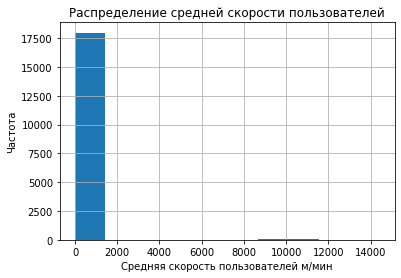

In [32]:
# построим график значений параметра скорости 
data_dist_per_min['dist_per_min'].hist()
plt.xlabel("Средняя скорость пользователей м/мин")
plt.ylabel("Частота")
plt.title('Распределение средней скорости пользователей')
plt.show()

In [33]:
# на графике видны аномальные значения на значениях близких к 10000, изучим эти данные
data_dist_per_min.query('8000 < dist_per_min < 12000')

,user_id,distance,duration,date,month,dist_per_min
6531,701,4196.445201,0.5,2021-08-31,8,8392.890401
6570,704,4830.824371,0.5,2021-10-14,10,9661.648742
6680,712,4684.004397,0.5,2021-03-04,3,9368.008793
6695,713,5215.642710,0.5,2021-02-25,2,10431.285420
6768,718,5197.436649,0.5,2021-02-11,2,10394.873299
...,...,...,...,...,...,...
16817,1444,5830.705170,0.5,2021-08-29,8,11661.410340
17004,1460,5531.335845,0.5,2021-01-19,1,11062.671691
17314,1483,4445.481070,0.5,2021-03-06,3,8890.962140
17505,1496,5722.551787,0.5,2021-02-14,2,11445.103574


In [34]:
data_dist_per_min.query('8000 < dist_per_min < 12000')['duration'].describe()

count    85.0
mean      0.5
std       0.0
min       0.5
25%       0.5
50%       0.5
75%       0.5
max       0.5
Name: duration, dtype: float64

Аномальные значения соотношения расстояния поездки ко времени выявлены в наблюдениях со значением 0,5. Заменим аномалию на значение равное частному от деления расстояния на среднее значение параметра проезжаемых метров в минуту.

In [35]:
# рассчитаем значение без учёта аномалий
mean_dist_per_min = data_dist_per_min.query('duration != 0.5')['dist_per_min'].mean()
mean_dist_per_min

176.91526708769788

In [36]:
# Напишем функцию для работы с аномалиями
def remove_anom(row):
    duration = row['duration']
    distance = row['distance']
    if duration == 0.5:
        return distance/mean_dist_per_min
    return duration

In [37]:
# применим функцию к столбцу с продолжительностью поездки
data_rides['duration'] = data_rides.apply(remove_anom, axis=1)

In [38]:
data_rides.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.954346,6.486772
std,434.734317,1116.831209,6.018595,3.437410
min,1.000000,0.855683,2.035632,1.000000
25%,487.000000,2543.226360,13.697117,4.000000
50%,889.000000,3133.609994,17.750643,6.000000
75%,1213.250000,3776.222735,21.824361,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


In [39]:
# проверим получаемое среднее и построим гистограмму
sample = data_rides['distance']/data_rides['duration']
sample.mean()

176.91526708769788

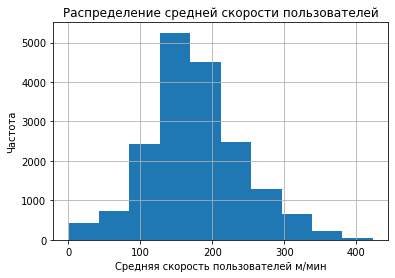

In [40]:
sample.hist()
plt.xlabel("Средняя скорость пользователей м/мин")
plt.ylabel("Частота")
plt.title('Распределение средней скорости пользователей')
plt.show()

In [41]:
data_sub

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Дубликатов в data_rides и data_sub не выявлено

# Шаг 3. Исследовательский анализ данных

##### Описание и визуализация общей информации о пользователях и поездках

###### Частота встречаемости городов

In [42]:
# Выведем датасет
data_users

,index,user_id,name,age,city,subscription_type
0,0,1,Кира,22,Тюмень,ultra
1,1,2,Станислав,31,Омск,ultra
2,2,3,Алексей,20,Москва,ultra
3,3,4,Константин,26,Ростов-на-Дону,ultra
4,4,5,Адель,28,Омск,ultra
...,...,...,...,...,...,...
1529,1529,1530,Ростислав,29,Сочи,free
1530,1530,1531,Никита,25,Пятигорск,free
1531,1531,1532,Алексей,26,Тюмень,free
1532,1532,1533,Степан,22,Краснодар,free


In [43]:
# Построим таблицу частот по городам из data_users
city_freq = data_users['city'].value_counts()
city_freq

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

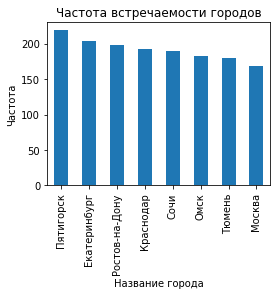

In [44]:
# Для отражения частот построим столбчатый график 
data_users['city'].value_counts().plot(
    kind='bar', title='Частота встречаемости городов', xlabel='Название города', ylabel='Частота', figsize=(4,3)
)
plt.show()

Таким образом, наиболее часто встречающийся город - Пятигорск, наименее часто - Москва. Разброс знаяений примерно 30%.

###### Соотношение пользователей с подпиской и без подписки

In [45]:
# применим сводную таблицу для вывода значений 
data_users.pivot_table(index='subscription_type', aggfunc='count')['user_id']

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64

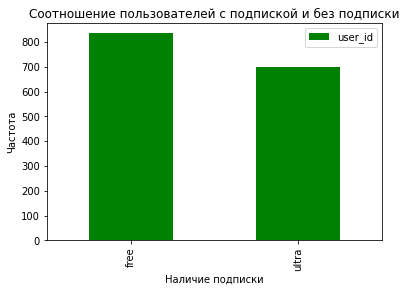

In [46]:
# построим соответствующий столбчатый график и piechart по соотношению пользователей с подпиской/без подписки 
pd.pivot_table(data=data_users, index='subscription_type', aggfunc='count').plot(
    kind='bar', y='user_id', title='Соотношение пользователей с подпиской и без подписки', color='green', ylabel='Частота', xlabel='Наличие подписки'
);

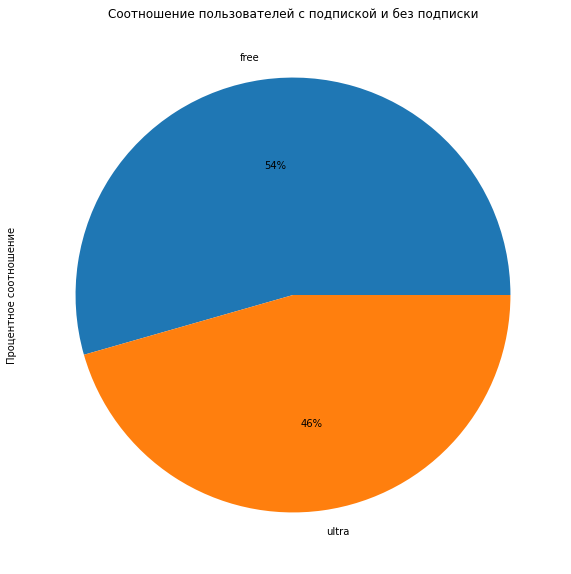

In [47]:
data_users['subscription_type'].value_counts().plot(
    kind='pie', title='Соотношение пользователей с подпиской и без подписки', figsize = (10,10), autopct = '%1.0f%%', ylabel='Процентное соотношение'
)
plt.show()

In [48]:
print(f'Пользователей без подписки больше на {round((835-699)/699, 2)*100}%')

Пользователей без подписки больше на 19.0%


Таким образом, пользователей без подписки примерно на 20% больше, чем пользователей с подпиской.

###### Возраст пользователей

In [49]:
# выведем описательную статистику для параметра возраста
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [50]:
data_users['age'].unique()

array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43])

In [51]:
# найдём наиболее часто встречающееся значение - моду
data_users['age'].mode()[0]

25

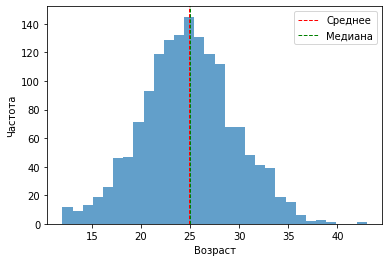

In [52]:
data_age = data_users['age']

mean_value = data_users['age'].mean()
median_value = data_users['age'].median()

# построим гистограмму с вертикальными линиями медианы и среднего значения
plt.hist(data_age, bins=30, alpha=0.7)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label='Медиана')
plt.legend()

# Названия осей и заголовок
plt.xlabel('Возраст')
plt.ylabel('Частота')

# Показать график
plt.show()

Таким образом, в данных представлены пользователи возраста от 12 до 43 лет. Среднее и медиана практически совпадают, что свидетельствует об отсутствии выбросов. Наиболее часто встречающееся пользователи 25 лет.

###### Расстояние, преодолеваемое пользователем за одну поездку

In [53]:
# построим сводную таблицу по среднему расстоянию, которое преодолел каждый пользователь
pt_dist = data_rides.pivot_table(index='user_id', values='distance', aggfunc='mean')
pt_dist

,distance
user_id,
1,2839.181839
2,3087.641692
3,3075.633155
4,3202.656423
5,3232.449968
...,...
1530,2750.498225
1531,2915.425836
1532,2607.861784


In [54]:
# выведем описательную статистику
pt_dist.describe()

,distance
count,1534.000000
mean,3077.296650
std,327.624403
min,1630.788427
25%,2882.505704
50%,3090.864050
75%,3293.325678
max,4287.519387


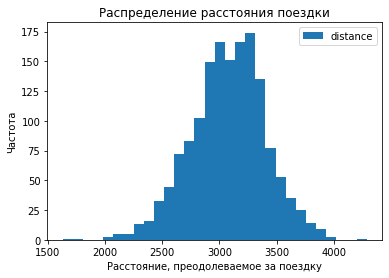

In [55]:
# построим гистограмму по полученным значениям
pt_dist.plot(kind='hist', bins=30, title='Распределение расстояния поездки')
plt.ylabel('Частота')
plt.xlabel('Расстояние, преодолеваемое за поездку')
plt.show()

Таким образом, в среднем за поездку пользователи преодолевают около 3 км.

###### Продолжительность поездок

In [56]:
# выведем описательную статистику по продолжительности поездок
data_rides['duration'].describe()

count    18068.000000
mean        17.954346
std          6.018595
min          2.035632
25%         13.697117
50%         17.750643
75%         21.824361
max         40.823963
Name: duration, dtype: float64

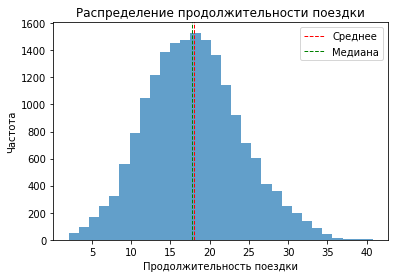

In [57]:
# построим гистограмму
data_duration = data_rides['duration']

dur_mean_value = data_rides['duration'].mean()
dur_median_value = data_rides['duration'].median()

# построим гистограмму с вертикальными линиями медианы и среднего значения
plt.hist(data_duration, bins=30, alpha=0.7)
plt.axvline(dur_mean_value, color='red', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(dur_median_value, color='green', linestyle='dashed', linewidth=1, label='Медиана')
plt.legend()

# Названия осей и заголовок
plt.xlabel('Продолжительность поездки')
plt.ylabel('Частота')
plt.title('Распределение продолжительности поездки')

# Показать график
plt.show()

Таким образом, в среднем на поездку тратят около 17-18 минут. Максимальное значение - 40 минут, минимальное - 2 минуты.

# Шаг 4. Объединение данных

In [58]:
# рассмотрим размерность исходных датасетов
print(f'Размерность data_users: {data_users.shape}')
print(f'Размерность data_rides: {data_rides.shape}')
print(f'Размерность data_sub: {data_sub.shape}')

Размерность data_users: (1534, 6)
Размерность data_rides: (18068, 5)
Размерность data_sub: (2, 4)


Объединим data_users и data_rides по столбцу user_id, затем полученную таблицу объединим с data_sub по столбцу subscription_type. После объединений размерность таблицы, к которой присоединяем должна совпадать с исходной. 

In [59]:
# Объединим данные о пользователях, поездках и подписках в один датафрейм.
data_users_rides = data_rides.merge(data_users, on='user_id', how='left')
data = data_users_rides.merge(data_sub, on='subscription_type', how='left')
data

,user_id,distance,duration,date,month,index,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,0,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,0,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,0,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,0,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,0,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,1533,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,1533,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,1533,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,1533,Альберт,25,Краснодар,free,8,50,0


In [60]:
# проверим информацию о таблице на наличие пропусков и для выявления размерности
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   index              18068 non-null  int64         
 6   name               18068 non-null  object        
 7   age                18068 non-null  int64         
 8   city               18068 non-null  object        
 9   subscription_type  18068 non-null  object        
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

Таким образом, после объединений, размерность таблицы совпадает с той, к которой мы присоединяли. Пропусков не выявлено.

In [61]:
# создадим датафрейм c данными о пользователях без подписки
data_free = data.query('subscription_type == "free"')
data_free

,user_id,distance,duration,date,month,index,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,699,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,699,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,699,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,699,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,699,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,1533,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,1533,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,1533,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,1533,Альберт,25,Краснодар,free,8,50,0


In [62]:
# создадим датафрейм c данными о пользователях c подпиской
data_ultra = data.query('subscription_type == "ultra"')
data_ultra

,user_id,distance,duration,date,month,index,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,0,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,0,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,0,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,0,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,0,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,698,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.702563,15.892886,2021-09-12,9,698,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.159348,14.389525,2021-09-26,9,698,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.845501,15.839579,2021-10-17,10,698,Оксана,22,Москва,ultra,6,0,199


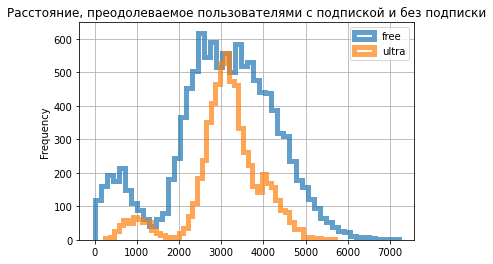

In [63]:
# Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий
dist_free = data_free.plot(
kind='hist', y='distance', histtype='step', bins=50, linewidth=5, alpha=0.7, label='free'
)
data_ultra.plot(
kind='hist', y='distance', histtype='step', bins=50, linewidth=5, alpha=0.7, label='ultra', ax=dist_free, grid=True, legend=True, title='Расстояние, преодолеваемое пользователями с подпиской и без подписки'
);

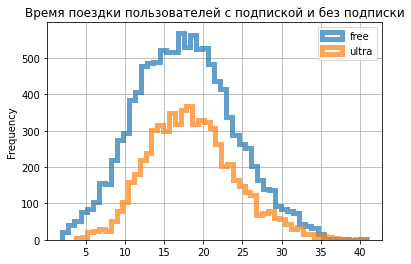

In [64]:
dur_free = data_free.plot(
kind='hist', y='duration', histtype='step', bins=50, linewidth=5, alpha=0.7, label='free'
)
data_ultra.plot(
kind='hist', y='duration', histtype='step', bins=50, linewidth=5, alpha=0.7, label='ultra', ax=dur_free, grid=True, legend=True, title='Время поездки пользователей с подпиской и без подписки'
);

Таким образом, у пользователей с подпиской и без выявлены одинаковые тенденции - графики похожи, при этом дисперсия (разброс вокруг среднего) расстояния у пользователей с подпиской меньше. На графике расстояния виден спад в частоте  - у пользователей с подпиской около 1500, у пользователей без подписки - около 2000. У пользователей с подпиской два пика на гистограмме расстояния - на значениях примерно 2500 и 3500. Среднее расстояние у обоих категорий около 3000 м. Среднее время поездки, согласно графикам, для двух категорий примерно 15-20 минут. Разброс вокруг среднего времени поездки примерно одинаковый.

# Шаг 5. Подсчёт выручки

In [65]:
# Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными
data_agg = pd.pivot_table(data, index=['month', 'user_id'], values = ['distance', 'date', 'duration', 'name', 'start_ride_price', 'minute_price', 'subscription_fee', 'subscription_type'],
                          aggfunc = {'distance': 'sum', 'date': 'count', 'duration': 'sum', 'start_ride_price': 'mean', 'minute_price': 'mean', 'subscription_fee': 'mean', 'subscription_type': 'min'}
)
data_agg.rename(columns = {'date' : 'rides'}, inplace = True)
data_agg['duration'] = np.ceil(data_agg['duration'])
data_agg

rides     distance  duration  minute_price  start_ride_price  \
month user_id                                                                 
1     1            2  7027.511294      42.0             6                 0   
      3            1  3061.777147      13.0             6                 0   
      5            1  3914.646990      13.0             6                 0   
      7            2  6478.080979      28.0             6                 0   
      12           1  3577.151148      33.0             6                 0   
...              ...          ...       ...           ...               ...   
12    1525         1  4597.854350      34.0             8                50   
      1526         1  3644.121544      23.0             8                50   
      1528         1  3998.569324      11.0             8                50   
      1532         2  6111.889853      41.0             8                50   
      1534         1  2371.711192      16.0             8                50   

               subscription_fee subscription_type  
month user_id                                      
1     1                     199             ultra  
      3                     199             ultra  
      5                     199             ultra  
      7                     199             ultra  
      12                    199             ultra  
...                         ...               ...  
12    1525                    0              free  
      1526                    0              free  
      1528                    0              free  
      1532                    0              free  
      1534                    0              free  

[11331 rows x 7 columns]

In [66]:
# добавим столбец с помесячной выручкой
data_agg['profit'] = data_agg['start_ride_price']*data_agg['rides']+data_agg['minute_price']*data_agg['duration']+data_agg['subscription_fee']

data_agg

rides     distance  duration  minute_price  start_ride_price  \
month user_id                                                                 
1     1            2  7027.511294      42.0             6                 0   
      3            1  3061.777147      13.0             6                 0   
      5            1  3914.646990      13.0             6                 0   
      7            2  6478.080979      28.0             6                 0   
      12           1  3577.151148      33.0             6                 0   
...              ...          ...       ...           ...               ...   
12    1525         1  4597.854350      34.0             8                50   
      1526         1  3644.121544      23.0             8                50   
      1528         1  3998.569324      11.0             8                50   
      1532         2  6111.889853      41.0             8                50   
      1534         1  2371.711192      16.0             8                50   

               subscription_fee subscription_type  profit  
month user_id                                              
1     1                     199             ultra   451.0  
      3                     199             ultra   277.0  
      5                     199             ultra   277.0  
      7                     199             ultra   367.0  
      12                    199             ultra   397.0  
...                         ...               ...     ...  
12    1525                    0              free   322.0  
      1526                    0              free   234.0  
      1528                    0              free   138.0  
      1532                    0              free   428.0  
      1534                    0              free   178.0  

[11331 rows x 8 columns]

# Шаг 6. Проверка гипотез

In [67]:
# Гипотеза 1: пользователи с подпиской тратят больше времени на поездки
# H0: средние равны
# H1: среднее пользователей с подпиской больше 

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки')
else:
    print('Не получилось отвергнуть нулевую гипотезу: пользователи с подпиской и без неё тратят одинаковое время на поездки') 

p-значение: 1.5076387977030259e-24
Отвергаем нулевую гипотезу: пользователи с подпиской тратят больше времени на поездки


In [68]:
# Гипотеза 2: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров
# H0: среднее равно 3130 м
# H1: среднее больше 3130 м

interested_value = 3130 

alpha = 0.05 # уровень статистической значимости

results2 = st.ttest_1samp(data_ultra['distance'], interested_value, alternative='greater') 

print('p-значение:', results2.pvalue) 

if results2.pvalue<alpha:
    print('Отвергаем нулевую гипотезу: среднее расстояние значимо меньше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: подписчики в среднем проезжают расстояние больше оптимального')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: подписчики в среднем проезжают расстояние больше оптимального


Таким образом, среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, значимо больше 3130 метров. Опровергаем гипотезу 2.

In [69]:
# Гипотеза 3: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [70]:
# H0: средние помесячные выручки равны
# H1: средняя помесячная выручка пользователей с подпиской больше 

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(data_agg.loc[data_agg.subscription_type == 'ultra', 'profit'], data_agg.loc[data_agg.subscription_type == 'free', 'profit'], alternative='greater', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской по месяцам выше')
else:
    print('Не получилось отвергнуть нулевую гипотезу: помесячная выручка для категорий равна')

p-значение: 3.886100938377994e-37
Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской по месяцам выше


Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: для данной ситуации подойдёт двухвыборочный t-тест для зависимых выборок, метод st.ttest_rel(). Проверяем одностороннюю гипотезу.

Н0: средние значения выборок до и после обновления сервиса равны

Н1: среднее значение выборки после обновления сервиса меньше среднего до обновления

# Шаг 7. Распределения

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум  100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.  
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают  10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно  5 % Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Минимальное количество промокодов, чтобы вероятность не выполнить план была 5%: 1161


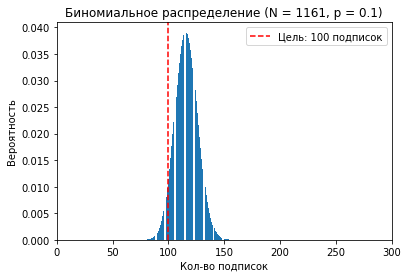

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


p = 0.1  # Вероятность продления подписки
k = 100  # Минимальное количество пользователей, которые должны продлить подписку
alpha = 0.05  # Уровень значимости

# Функция для поиска минимального N

N = k  # Начинаем с того, что N равно 100
while True:        
    prob = binom.cdf(k - 1, N, p)
    if prob <= alpha:
        break
    N += 1

print(f"Минимальное количество промокодов, чтобы вероятность не выполнить план была 5%: {N}")

# Построим график распределения для найденного N_min
x = np.arange(0, N + 1)
pmf = binom.pmf(x, N, p)

plt.bar(x, pmf)
plt.xlim(0, 300)
plt.axvline(k, color='red', linestyle='--', label=f'Цель: {k} подписок')
plt.title(f'Биномиальное распределение (N = {N}, p = {p})')
plt.xlabel('Кол-во подписок')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность того, что уведомление откроют не более 399500 пользователей: 0.15


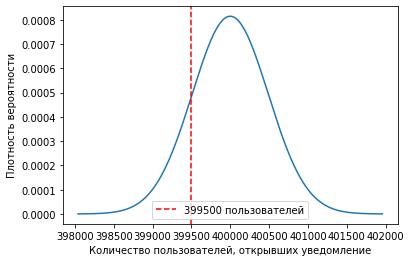

In [72]:
# 7.2
from scipy.stats import norm
from math import sqrt

N = 1000000  # количество уведомлений
p = 0.4  # вероятность открытия уведомления
k = 399500  # количество пользователей, которые откроют уведомление

mu = N * p  # математическое ожидание
sigma = sqrt(N * p * (1 - p))  # стандартное отклонение

# Оценка вероятности с помощью нормальной аппроксимации
distr = st.norm(mu, sigma)
prob = distr.cdf(k)

print(f"Вероятность того, что уведомление откроют не более {k} пользователей: {round(prob, 2)}")

# Построение графика нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf)
plt.axvline(k, color='red', linestyle='--', label=f'{k} пользователей')
plt.xlabel('Количество пользователей, открывших уведомление')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

**Общий вывод**
- Пропусков в данных не выявлено, полные дубликаты удалены, аномалии в столбце продолжительности поездок обработаны.
- Частота всех городов практически равна (примерно 13%), при этом наиболее часто встречающийся город - Пятигорск, наименее часто - Москва.
- Пользователей с подпиской 46%, без подписки 54%.
- В данных представлены пользователи возраста от 12 до 43 лет. Среднее и медиана практически совпадают, что свидетельствует об отсутствии выбросов. Наиболее часто встречающееся пользователи 25 лет.
- Среднее время в пути 17-18 минут.
- Среднее расстояние 3 км.
- У пользователей с подпиской и без выявлены одинаковые тенденции - графики похожи, при этом дисперсия (разброс вокруг среднего) расстояния у пользователей с подпиской меньше, а эксцесс времени поездки (мера вершиности графика) - меньше.
- Гипотеза 1: пользователи с подпиской тратят больше времени на поездки - не отвергаем
- Гипотеза 2: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров - опровергаем.
- Гипотеза 3: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки - не отвергаем.

**Рекомендации:** отделу маркетинга следует продвигать подписку ultra - помесячная выручка пользователей данной категории выше, при этом их процентное соотношение меньше, чем пользователей без подписки.